# CODE TO IMPORT CSV FILE 

In [1]:
from google.colab import files
uploaded = files.upload()

Saving house (1).csv to house (1).csv


# Importing Basic libraries :

In [65]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

# Storing dataset in df variable :

In [4]:
df = pd.read_csv("house (1).csv")

# Column names and its meaning in short :

In [12]:
#Data Given :
#Rooms	Number of rooms
#Type	Property type
#Price	Price in dollars
#Method	Property status
#SellerG	Real Estate Agent
#Distance	Distance from CBD
#Postcode	Code of the area
#Bathroom	Number of Bathrooms
#Car	Number of carspots
#Landsize	Land Size
#BuildingArea	Building Size
#YearBuilt	The year in which home was built
#CouncilArea	Governing council for the area
#Longtitude	The angular distance of a place east or west
#Regionname	General Region (West, North West, North, Northeast …etc)
#PropertyCount	Number of properties that exist in the suburb

# Top Information about dataset :

In [5]:
df.head()

,Rooms,Type,Price,Method,SellerG,Distance,Postcode,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Longtitude,Regionname,Propertycount
0,2,0,1035000,1,23,2.5,3067,1,0,156,79.0,1900,31,144.9934,2,4019
1,3,0,1465000,3,23,2.5,3067,2,0,134,150.0,1900,31,144.9944,2,4019
2,4,0,1600000,4,155,2.5,3067,1,2,120,142.0,2014,31,144.9941,2,4019
3,3,0,1876000,1,155,2.5,3067,2,0,245,210.0,1910,31,144.9993,2,4019
4,2,0,1636000,1,155,2.5,3067,1,2,256,107.0,1890,31,144.9954,2,4019


# Bottom Information about dataset :

In [6]:
df.tail()

,Rooms,Type,Price,Method,SellerG,Distance,Postcode,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Longtitude,Regionname,Propertycount
6825,2,0,650000,0,152,14.5,3087,1,1,210,79.0,2006,-1,145.07878,2,2329
6826,4,0,635000,1,260,14.7,3030,2,1,662,172.0,1980,-1,144.64789,6,16166
6827,3,0,1031000,3,251,6.8,3016,2,2,333,133.0,1995,-1,144.87904,6,6380
6828,4,0,2500000,0,222,6.8,3016,1,5,866,157.0,1920,-1,144.89299,6,6380
6829,4,0,1285000,3,239,6.3,3013,1,1,362,112.0,1920,-1,144.88449,6,6543


# Information releted to dataset :

In [11]:
print('Rows :',df.shape[0])
print('Columns :',df.shape[1])
print('\nFeatures :\n :',df.columns.tolist())
print('\nMissing values :',df.isnull().values.sum())
print('\nUnique values : \n',df.nunique())

Rows : 6830
Columns : 16

Features :
 : ['Rooms', 'Type', 'Price', 'Method', 'SellerG', 'Distance', 'Postcode', 'Bathroom', 'Car', 'Landsize', 'BuildingArea', 'YearBuilt', 'CouncilArea', 'Longtitude', 'Regionname', 'Propertycount']

Missing values : 0

Unique values : 
 Rooms               8
Type                3
Price            1647
Method              5
SellerG           214
Distance          197
Postcode          190
Bathroom            8
Car                11
Landsize         1161
BuildingArea      560
YearBuilt         136
CouncilArea        32
Longtitude       4335
Regionname          8
Propertycount     297
dtype: int64


# To check if there are missing values in dataset :

In [13]:
df.isnull().sum()

Rooms            0
Type             0
Price            0
Method           0
SellerG          0
Distance         0
Postcode         0
Bathroom         0
Car              0
Landsize         0
BuildingArea     0
YearBuilt        0
CouncilArea      0
Longtitude       0
Regionname       0
Propertycount    0
dtype: int64

# Detailed information related to dataset i.e.  mean /std /min /max etc :

In [14]:
df.describe()

,Rooms,Type,Price,Method,SellerG,Distance,Postcode,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Longtitude,Regionname,Propertycount
count,6830.000000,6830.000000,6.830000e+03,6830.000000,6830.000000,6830.000000,6830.000000,6830.000000,6830.000000,6830.000000,6830.000000,6830.000000,6830.000000,6830.000000,6830.000000,6830.000000
mean,2.978184,0.541435,1.077604e+06,1.438360,131.632211,10.148960,3104.262225,1.594143,1.606881,487.495461,143.446606,1964.444070,13.603075,144.991877,3.792679,7433.780527
std,0.970479,0.834160,6.733202e+05,1.142603,77.124693,5.991423,91.208614,0.714366,0.944613,910.805627,89.970692,37.706332,10.370476,0.104983,2.011551,4352.096045
min,1.000000,0.000000,1.310000e+05,0.000000,0.000000,0.000000,3000.000000,1.000000,0.000000,0.000000,0.000000,1196.000000,-1.000000,144.542370,0.000000,389.000000
25%,2.000000,0.000000,6.300000e+05,1.000000,73.000000,6.100000,3044.000000,1.000000,1.000000,167.000000,93.000000,1940.000000,2.000000,144.925522,2.000000,4381.250000
50%,3.000000,0.000000,8.900000e+05,1.000000,135.000000,9.200000,3083.000000,1.000000,2.000000,404.000000,126.000000,1970.000000,15.000000,144.997000,5.000000,6567.000000
75%,4.000000,1.000000,1.334000e+06,1.000000,194.000000,13.000000,3147.000000,2.000000,2.000000,641.000000,173.000000,2000.000000,23.000000,145.056100,5.000000,10175.000000
max,8.000000,2.000000,9.000000e+06,4.000000,267.000000,47.400000,3977.000000,8.000000,10.000000,37000.000000,3112.000000,2018.000000,32.000000,145.526350,7.000000,21650.000000


# To check the object of the dataset :

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6830 entries, 0 to 6829
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Rooms          6830 non-null   int64  
 1   Type           6830 non-null   int64  
 2   Price          6830 non-null   int64  
 3   Method         6830 non-null   int64  
 4   SellerG        6830 non-null   int64  
 5   Distance       6830 non-null   float64
 6   Postcode       6830 non-null   int64  
 7   Bathroom       6830 non-null   int64  
 8   Car            6830 non-null   int64  
 9   Landsize       6830 non-null   int64  
 10  BuildingArea   6830 non-null   float64
 11  YearBuilt      6830 non-null   int64  
 12  CouncilArea    6830 non-null   int64  
 13  Longtitude     6830 non-null   float64
 14  Regionname     6830 non-null   int64  
 15  Propertycount  6830 non-null   int64  
dtypes: float64(3), int64(13)
memory usage: 853.9 KB


# To check the Correlation of dataset with all columns to price :

In [16]:
corr = df.corr()

In [17]:
corr

,Rooms,Type,Price,Method,SellerG,Distance,Postcode,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Longtitude,Regionname,Propertycount
Rooms,1.000000,-0.579983,0.517718,-0.048423,-0.017318,0.289763,0.068674,0.613285,0.420493,0.099031,0.603150,-0.049272,-0.205097,0.096665,-0.005093,-0.100447
Type,-0.579983,1.000000,-0.419183,0.088179,0.021241,-0.240904,0.008063,-0.273788,-0.281780,-0.045246,-0.388990,0.320428,0.152362,0.002320,0.053642,0.098420
Price,0.517718,-0.419183,1.000000,-0.041462,-0.058529,-0.164975,0.109343,0.492481,0.250916,0.073536,0.520492,-0.307343,-0.125901,0.209786,0.090802,-0.053336
Method,-0.048423,0.088179,-0.041462,1.000000,-0.008489,-0.058832,-0.031344,-0.006614,-0.014382,-0.015780,-0.040639,0.024371,0.022126,-0.048818,0.025594,-0.020742
SellerG,-0.017318,0.021241,-0.058529,-0.008489,1.000000,0.026803,-0.002534,-0.029692,0.006835,-0.009812,-0.032581,0.010859,-0.000537,-0.057695,0.013905,0.061711
Distance,0.289763,-0.240904,-0.164975,-0.058832,0.026803,1.000000,0.438274,0.124044,0.265142,0.082449,0.155148,0.258462,-0.277766,0.215594,-0.094625,-0.061433
Postcode,0.068674,0.008063,0.109343,-0.031344,-0.002534,0.438274,1.000000,0.112776,0.049226,0.039998,0.081791,0.036819,-0.070475,0.430579,-0.013522,0.058542
Bathroom,0.613285,-0.273788,0.492481,-0.006614,-0.029692,0.124044,0.112776,1.000000,0.335331,0.081680,0.539717,0.166412,-0.114353,0.119573,0.036411,-0.062127
Car,0.420493,-0.281780,0.250916,-0.014382,0.006835,0.265142,0.049226,0.335331,1.000000,0.113427,0.331702,0.114340,-0.175219,0.061410,0.005498,-0.033258
Landsize,0.099031,-0.045246,0.073536,-0.015780,-0.009812,0.082449,0.039998,0.081680,0.113427,1.000000,0.082815,0.031474,-0.049916,0.026882,-0.009509,-0.014909


# Correlation using Heatmap :

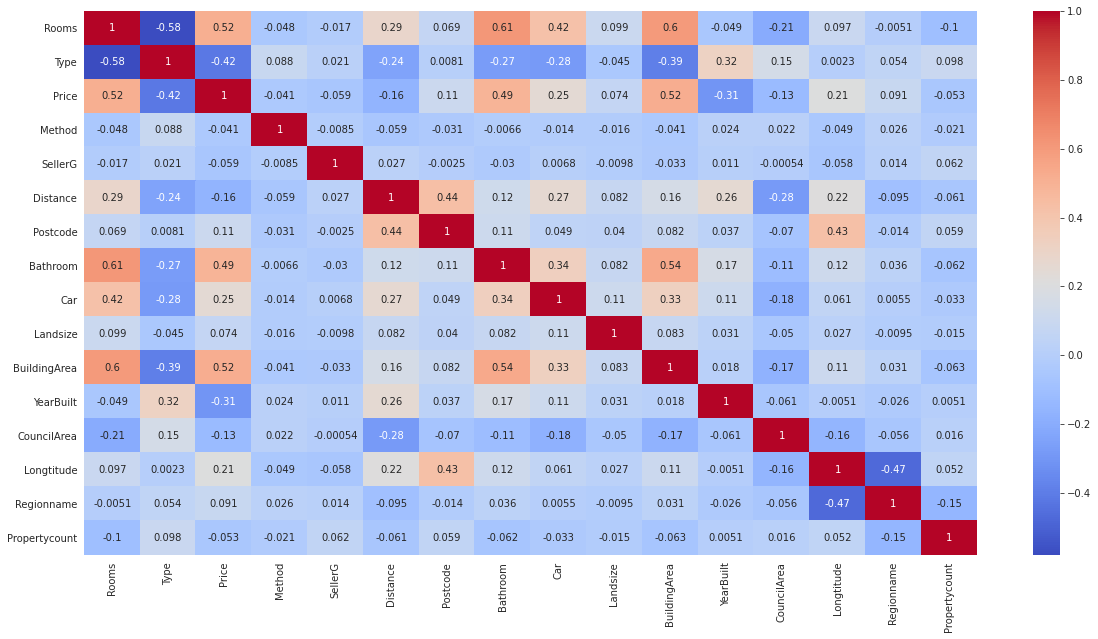

In [77]:
plt.figure(figsize=(20,10))
sns.heatmap(corr,annot=True,cmap="coolwarm")
plt.show()

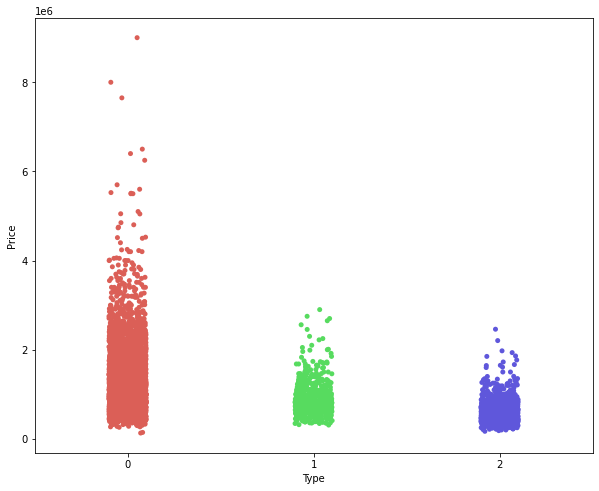

In [28]:
plt.figure(figsize=(10,8))
sns.stripplot(x=df['Type'],y=df['Price'],palette='hls')

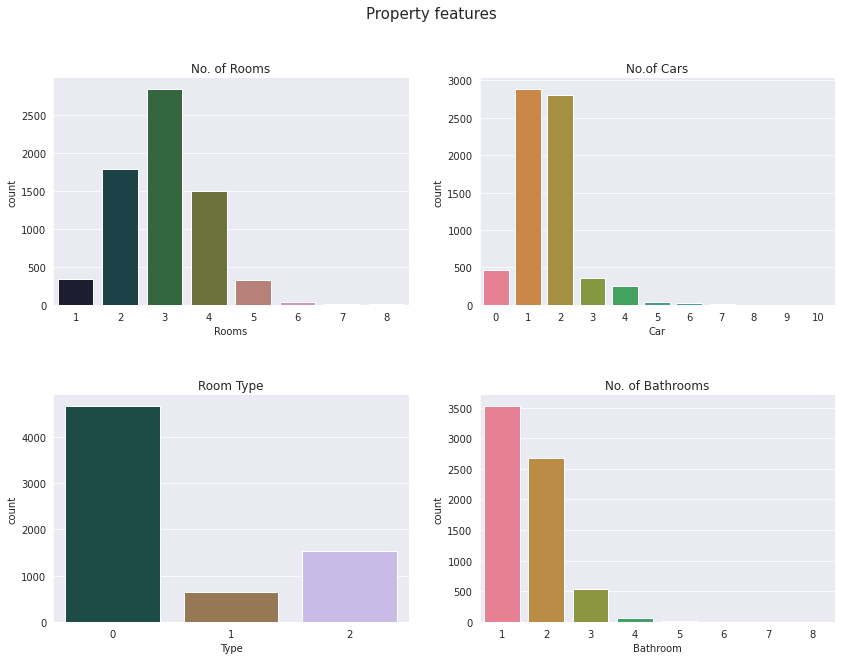

In [31]:
fig, axarr = plt.subplots(2, 2, figsize=(14,10))
fig.suptitle('Property features',fontsize=15)
sns.countplot(df['Rooms'],ax=axarr[0][0],palette='cubehelix').set_title('No. of Rooms')
sns.countplot(df['Type'],ax=axarr[1][0],palette='cubehelix').set_title('Room Type')
sns.countplot(df['Bathroom'],ax=axarr[1][1],palette='husl').set_title('No. of Bathrooms')
sns.countplot(df['Car'],ax=axarr[0][1],palette='husl').set_title('No.of Cars')
plt.subplots_adjust(hspace=.4)
sns.set_style('darkgrid')
sns.despine()

# Linear Regression :

In [33]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [35]:
X = df.drop("Price",axis=1)
y = df["Price"]

In [36]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=1)

In [37]:
lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

# Train score :

In [38]:

lr.score(X_train,y_train)

0.6376650445007466

#Test score :

In [41]:

lr.score(X_test,y_test)

0.5775984742888238

In [51]:
lr.coef_

array([ 1.18003726e+05, -1.68990114e+05, -7.26096664e+02, -1.24949413e+01,
       -4.63229765e+04,  1.06835688e+03,  2.02809523e+05,  5.19366172e+04,
        1.84105442e+01,  1.47156228e+03, -2.83199382e+03, -3.71622245e+03,
        1.47397536e+06,  4.83943558e+04, -1.28615933e+00])

In [121]:
y_pred = lr.predict(X_test)

In [122]:
mean_squared_error(y_test,y_pred)

329348377536.6401

In [123]:
r2_score(y_test,y_pred)

0.3669791756269811

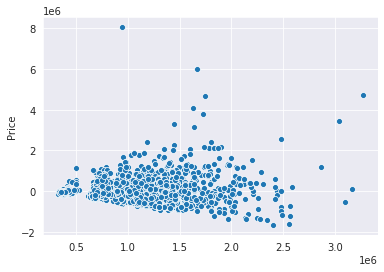

In [119]:
plt.figure()
sns.scatterplot(y_pred,residuals)
plt.show()

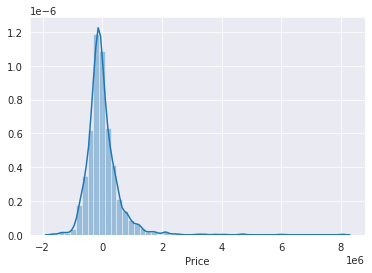

In [120]:
plt.figure()
sns.distplot(residuals)
plt.show()

# Ridge And Lasso :

In [61]:
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge

In [66]:
l2 = Ridge(10)
l2.fit(X_train,y_train)
l2.coef_

array([ 0.00000000e+00, -1.86044593e+03,  2.48087325e+03,  1.46706529e+03,
        1.14388758e+05,  4.28978676e+04, -1.60349953e+05, -2.14601766e+03,
        3.69698050e+02, -2.61824260e+04, -2.03999689e+05,  9.01619789e+04,
        1.01606788e+04,  1.89952486e+02, -5.57967851e+03, -5.09642656e+03,
       -2.79269289e+04, -4.59674498e+04, -6.56793895e+03, -4.49373696e+01,
       -3.25797757e+03,  2.18314505e+02,  3.76743721e+04, -1.93619979e+04,
       -4.99932911e+01, -3.51840344e+02, -2.34863000e+02, -3.70959611e+03,
        1.37671444e+03,  2.85900140e+02, -3.31517688e-02, -1.92055800e+03,
       -8.88008114e+03, -1.10789607e+02,  1.24872793e+04, -3.98453436e+02,
       -1.29673518e+04, -7.80743133e+03, -8.34764977e+01, -4.04875934e+01,
        1.64513516e+03,  1.67972486e+03, -1.41480059e+04, -7.92418083e+03,
       -4.93492388e-01, -2.38002119e+04, -7.86444093e+01, -1.52174596e+03,
       -2.20237923e+01, -2.54610425e+03,  6.27268043e+03, -5.62114411e+00,
        4.01541354e+01,  

In [104]:
# Lasso helps in feature selection
l1 = Lasso(1000)
l1.fit(X_train,y_train)
l1.coef_

array([ 0.00000000e+00,  2.88480504e+05, -0.00000000e+00,  2.10394370e+03,
       -3.10968109e+04,  2.85473867e+04, -1.30871596e+02, -2.50584878e+04,
        8.75150912e+02, -9.27280234e-01])

In [105]:
for i in range(100):
    l2 = Ridge(alpha=i)
    l2.fit(X_train,y_train)
    print(i,":",l2.score(X_test,y_test))

0 : 0.3669791756268673
1 : 0.3669638880652538
2 : 0.36694831035745834
3 : 0.3669324570550415
4 : 0.36691634204294576
5 : 0.3668999785766224
6 : 0.3668833793163423
7 : 0.36686655635921883
8 : 0.36684952126911685
9 : 0.3668322851046222
10 : 0.36681485844521367
11 : 0.36679725141577846
12 : 0.36677947370959607
13 : 0.3667615346099049
14 : 0.3667434430101504
15 : 0.3667252074330194
16 : 0.3667068360483422
17 : 0.3666883366899414
18 : 0.3666697168715064
19 : 0.36665098380155714
20 : 0.36663214439755976
21 : 0.3666132052992558
22 : 0.3665941728812489
23 : 0.3665750532649086
24 : 0.36655585232962673
25 : 0.36653657572347464
26 : 0.3665172288732953
27 : 0.36649781699427014
28 : 0.36647834509898747
29 : 0.3664588180060515
30 : 0.3664392403482506
31 : 0.3664196165803194
32 : 0.3663999509863157
33 : 0.36638024768663513
34 : 0.3663605106446823
35 : 0.366340743673225
36 : 0.36632095044044244
37 : 0.36630113447569057
38 : 0.3662812991749943
39 : 0.36626144780628855
40 : 0.36624158351441793
41 : 0.36

In [106]:
for i in range(200,1000,50):
    l1 = Lasso(alpha=i)
    l1.fit(X_train,y_train)
    print(i,":",l1.score(X_test,y_test))

200 : 0.36705045470175923
250 : 0.3670653877987528
300 : 0.36707918337359524
350 : 0.36709181650256884
400 : 0.36710269366536563
450 : 0.36710889543852965
500 : 0.3671119754773392
550 : 0.3671154038714809
600 : 0.3671184785032655
650 : 0.3671211799405536
700 : 0.36712350790126114
750 : 0.36712548850429694
800 : 0.36712707238478925
850 : 0.36712831064466445
900 : 0.36712917830372815
950 : 0.36712967585802303


In [107]:
# Final models
l2 = Ridge(alpha=2)
l2.fit(X_train,y_train)
print(l2.score(X_test,y_test))

0.36694831035745834


In [108]:
l2.coef_

array([ 0.00000000e+00,  3.15941989e+05, -2.65418687e+04,  2.03730984e+03,
       -3.89470756e+04,  4.11950303e+04, -1.06602082e+02, -2.84589626e+04,
        8.54241412e+02, -9.29178257e-01])

In [109]:
l1 = Lasso(alpha=200)
l1.fit(X_train,y_train)
print(l1.score(X_test,y_test))

0.36705045470175923


In [110]:
l1.coef_

array([ 0.00000000e+00,  3.12280303e+05, -1.43998803e+04,  2.01883198e+03,
       -3.73370402e+04,  3.69267371e+04, -1.05632775e+02, -2.80655160e+04,
        8.63372989e+02, -9.30630626e-01])

# Cross Validation :

In [111]:
from sklearn.model_selection import cross_val_score

In [112]:
l1_cross = cross_val_score(l1,X,y,cv=4)

In [114]:
l1_cross

array([0.38894093, 0.42255499, 0.34942492, 0.09208095])

In [115]:
l2_cross = cross_val_score(l2,X,y,cv=4)

In [116]:
l2_cross

array([0.38919251, 0.42256583, 0.34940623, 0.09192125])

In [117]:
np.mean(l1_cross)


0.3132504472167609

In [118]:
np.mean(l2_cross)

0.31327145417293023

# Polynomial Regression :

In [53]:
from sklearn.preprocessing import PolynomialFeatures

In [80]:
X = df[["Rooms","Bathroom","BuildingArea"]]
y = df["Price"]

In [81]:
pf = PolynomialFeatures(2)

In [82]:
X_poly = pf.fit_transform(X)

In [83]:
X_train, X_test, y_train, y_test = train_test_split(X_poly,y,random_state=1,test_size=0.3)

In [84]:
lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [85]:
y_pred = lr.predict(X_test)

In [86]:
mean_squared_error(y_test,y_pred)

329348377536.6401

In [87]:
r2_score(y_test,y_pred)

0.3669791756269811

In [92]:
residuals = y_test - y_pred


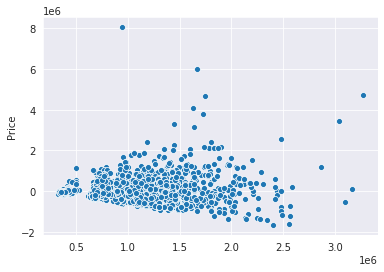

In [124]:
plt.figure()
sns.scatterplot(y_pred,residuals)
plt.show()

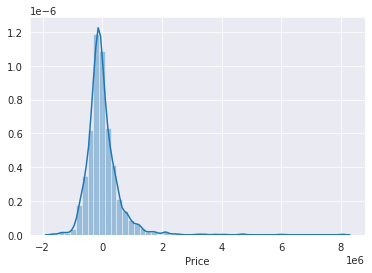

In [125]:
plt.figure()
sns.distplot(residuals)
plt.show()